# 1. Xem lại công thức tính node trong hidden layer, biểu diễn bài toán dưới dạng ma trận.

$$\begin{aligned}
&X=A^{(0)}\in \mathrm{R}^{N\times d^{(0)}},A^{(l)}\in R^{N\times d^{(l)}},Z^{(l)}\in R^{N\times d^{(l)}}\\
&W^{(l)}\in R^{d^{(l-1)}\times d^{(l)}}, \textbf{b}^{(l)}\in R^{d^{(l)}\times 1}\\
&Z^{(l)}=A^{(l-1)}\cdot W^{(l)}+\left[\begin{matrix}\textbf{b}^{(l)T}\\\textbf{b}^{(l)T}\\\cdots\\\textbf{b}^{(l)T}\end{matrix}\right]\\
&A^{(l)}=g(Z^{(l)})
\end{aligned}$$

# 2. Hiểu hết và chạy lại code (softmax, cross_entropy, batch update)

## 2.1 Softmax

In [ ]:
def softmax(Z):
    """
    Shape of Z: (N,d)
    """
    A=np.exp(Z)/np.sum(np.exp(Z),axis=1,keepdims=True)
    return A

In [ ]:
import numpy as np
z=np.random.randn(5,1).T
a=softmax(z)

In [ ]:
print("z:\n",z.T)
print("a=softmax(z):\n",a.T)

z:
 [[ 0.02314607]
 [ 0.65098856]
 [-0.80584002]
 [-0.89600673]
 [ 1.03114079]]
a=softmax(z):
 [[0.15506248]
 [0.29051948]
 [0.06768347]
 [0.06184773]
 [0.42488684]]


## 2.2 Cross_entropy

In [ ]:
def cross_entropy(Yhat,y):
    indexes=range(Yhat.shape[0])
    loss=-np.sum(np.log(Yhat[indexes,y]))
    return loss

In [ ]:
import numpy as np

N=10
d=5 # 5 class
#tao ra label cua tap du lieu
y=np.random.randint(d,size=N)
print("y:",y)

#tao ra Yhat (Gia tri model tinh ra)
Yhat=softmax(np.random.randn(N,d))
print("Yhat:",Yhat.shape)
print(Yhat)

loss=cross_entropy(Yhat,y)
print("loss:",loss)



y: [2 4 4 0 4 3 0 2 4 2]
Yhat: (10, 5)
[[0.22982603 0.02390439 0.48971475 0.10700932 0.14954552]
 [0.17029778 0.23322311 0.12082438 0.30289975 0.17275498]
 [0.04169577 0.21227038 0.15295022 0.19329877 0.39978486]
 [0.04738105 0.03999382 0.37704637 0.24372325 0.2918555 ]
 [0.47198252 0.07579383 0.12291028 0.2419333  0.08738007]
 [0.20176097 0.0248803  0.1962612  0.17446142 0.40263611]
 [0.01497053 0.05597615 0.20929029 0.14110563 0.5786574 ]
 [0.0385192  0.10703547 0.04857133 0.6188798  0.1869942 ]
 [0.05928451 0.22097516 0.0707334  0.08085348 0.56815346]
 [0.19193752 0.15314672 0.4476128  0.14414269 0.06316027]]
loss: 19.215298508528463


## 2.3 Batch Update
Note: Sau mỗi epoch phải shuffle tập dữ liệu lại.

# 3. Chỉnh các hyperparameter: learning rate, activation function, số hidden layer, số node. Thử dùng các model đơn giản hơn (không có hidden layer, 1 hidden layer) hay phức tạp hơn (nhiều hidden layer và node hơn), vẽ loss function theo epoch tương ứng.

In [ ]:
from __future__ import print_function
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train[0].shape, y_test[0]

((28, 28), 7)

In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize (0-1)
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
input_shape=(784,)
num_classes=10
# convert class vectors to binary class matrices
print(y_train[0])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
class Model():
    def __init__(self,input_shape,layers,learning_rate,activation):
        self.input_shape=input_shape
        self.layers=layers
        self.learning_rate=learning_rate
        self.activation=activation
        self.model=self.create_model()
        
    def create_model(self):
        model=Sequential()
        for layer in range(1,len(self.layers)+1):
            if layer==1:
                model.add(Dense(self.layers[layer-1],activation=self.activation,input_shape=self.input_shape))
                continue
                
            if layer==len(self.layers):
                model.add(Dense(self.layers[layer-1],activation="softmax"))
                break
            
            model.add(Dense(self.layers[layer-1],activation=self.activation))
        
        model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=self.learning_rate),metrics=['accuracy'])
        return model

## 3.1 Chỉnh các hyperparameter: learning rate, activation function, số hidden layer, số node

### 3.1.1 Chỉnh learning_rate

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
# learning_rate=0.01
model_1=Model(input_shape,[512,32,num_classes],0.01,'relu').model

In [ ]:
# learning_rate=0.001
model_2=Model(input_shape,[512,32,num_classes],0.001,'relu').model

In [ ]:
# learning_rate=0.1
model_3=Model(input_shape,[512,32,num_classes],0.1,'relu').model

In [ ]:
# learning_rate=1
model_4=Model(input_shape,[512,32,num_classes],1,'relu').model

In [ ]:
history_1=model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 1.2325 - accuracy: 0.6828 - val_loss: 0.5782 - val_accuracy: 0.8621
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4819 - accuracy: 0.8749 - val_loss: 0.3897 - val_accuracy: 0.8994
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.3739 - accuracy: 0.8970 - val_loss: 0.3333 - val_accuracy: 0.9087
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.9081 - val_loss: 0.2990 - val_accuracy: 0.9163
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.9147 - val_loss: 0.2787 - val_accuracy: 0.9228
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.9204 - val_loss: 0.2612 - val_accuracy: 0.9268
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2622 - accuracy: 0.9252 - val_loss: 0.2462 - val_accuracy: 0.9318
Epoch 

In [ ]:
history_2=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))


Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 2.1840 - accuracy: 0.2435 - val_loss: 2.0134 - val_accuracy: 0.4306
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 1.8659 - accuracy: 0.5141 - val_loss: 1.7042 - val_accuracy: 0.5815
Epoch 3/12
469/469 [==============================] - 2s 3ms/step - loss: 1.5620 - accuracy: 0.6449 - val_loss: 1.3974 - val_accuracy: 0.7054
Epoch 4/12
469/469 [==============================] - 2s 3ms/step - loss: 1.2795 - accuracy: 0.7334 - val_loss: 1.1410 - val_accuracy: 0.7642
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 1.0631 - accuracy: 0.7721 - val_loss: 0.9573 - val_accuracy: 0.7956
Epoch 6/12
469/469 [==============================] - 2s 3ms/step - loss: 0.9106 - accuracy: 0.7982 - val_loss: 0.8287 - val_accuracy: 0.8163
Epoch 7/12
469/469 [==============================] - 2s 3ms/step - loss: 0.8018 - accuracy: 0.8189 - val_loss: 0.7359 - val_accuracy: 0.8333
Epoch 

In [ ]:
history_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))


Epoch 1/12
469/469 [==============================] - 2s 5ms/step - loss: 0.4443 - accuracy: 0.8730 - val_loss: 0.2146 - val_accuracy: 0.9381
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.1899 - accuracy: 0.9448 - val_loss: 0.1522 - val_accuracy: 0.9544
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1367 - accuracy: 0.9606 - val_loss: 0.1223 - val_accuracy: 0.9630
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.1053 - accuracy: 0.9697 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 5/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0862 - accuracy: 0.9757 - val_loss: 0.0896 - val_accuracy: 0.9720
Epoch 6/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0710 - accuracy: 0.9798 - val_loss: 0.0850 - val_accuracy: 0.9742
Epoch 7/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0609 - accuracy: 0.9823 - val_loss: 0.0795 - val_accuracy: 0.9742
Epoch 

In [ ]:
history_4=model_4.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))


Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 0.6865 - accuracy: 0.8098 - val_loss: 0.2273 - val_accuracy: 0.9280
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1357 - accuracy: 0.9577 - val_loss: 0.1173 - val_accuracy: 0.9643
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0959 - accuracy: 0.9700 - val_loss: 0.1058 - val_accuracy: 0.9670
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0749 - accuracy: 0.9773 - val_loss: 0.1040 - val_accuracy: 0.9713
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9818 - val_loss: 0.0943 - val_accuracy: 0.9758
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.0903 - val_accuracy: 0.9752
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.0979 - val_accuracy: 0.9731
Epoch 

In [ ]:
import matplotlib.pyplot as plt

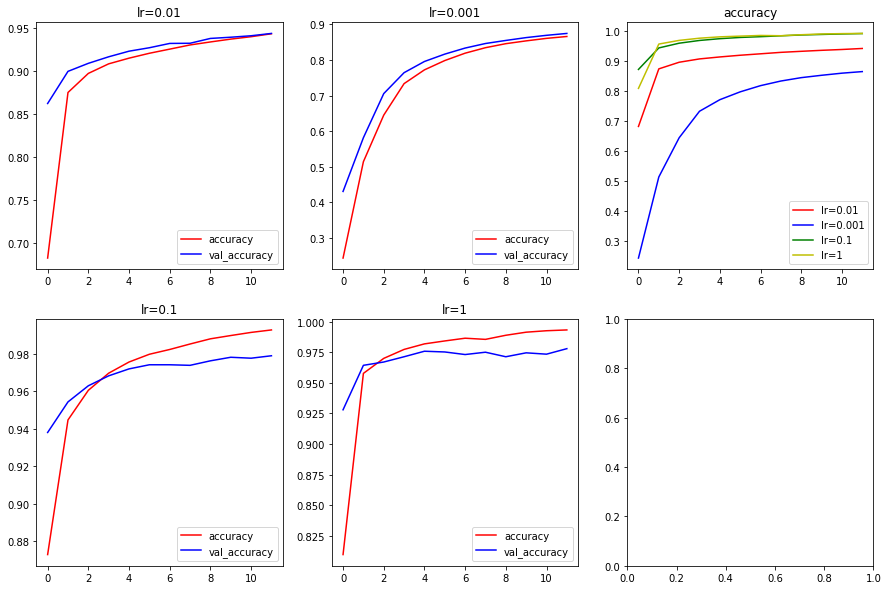

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,3,figsize=(15,10))

axes[0][0].set_title("lr=0.01")
axes[0][0].plot(history_1.history['accuracy'],'r',label='accuracy')
axes[0][0].plot(history_1.history['val_accuracy'],'b',label='val_accuracy')
axes[0][0].legend()

axes[0][1].set_title("lr=0.001")
axes[0][1].plot(history_2.history['accuracy'],'r',label='accuracy')
axes[0][1].plot(history_2.history['val_accuracy'],'b',label='val_accuracy')
axes[0][1].legend()

axes[1][0].set_title("lr=0.1")
axes[1][0].plot(history_3.history['accuracy'],'r',label='accuracy')
axes[1][0].plot(history_3.history['val_accuracy'],'b',label='val_accuracy')
axes[1][0].legend()

axes[1][1].set_title("lr=1")
axes[1][1].plot(history_4.history['accuracy'],'r',label='accuracy')
axes[1][1].plot(history_4.history['val_accuracy'],'b',label='val_accuracy')
axes[1][1].legend()

axes[0][2].set_title("accuracy")
axes[0][2].plot(history_1.history['accuracy'],'r',label='lr=0.01')
axes[0][2].plot(history_2.history['accuracy'],'b',label='lr=0.001')
axes[0][2].plot(history_3.history['accuracy'],'g',label='lr=0.1')
axes[0][2].plot(history_4.history['accuracy'],'y',label='lr=1')
axes[0][2].legend()



### 3.1.2 Chỉnh activation

In [ ]:
# activation=relu
model_1=Model(input_shape,[512,32,num_classes],0.01,'relu').model

In [ ]:
# activation=leaky_relu
model_2=Model(input_shape,[512,32,num_classes],0.01,tensorflow.keras.layers.LeakyReLU()).model

In [ ]:
# activation=sigmoid
model_3=Model(input_shape,[512,32,num_classes],0.01,'sigmoid').model

In [ ]:
history_1=model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 1.1493 - accuracy: 0.7120 - val_loss: 0.5589 - val_accuracy: 0.8633
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4697 - accuracy: 0.8799 - val_loss: 0.3818 - val_accuracy: 0.9000
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.9004 - val_loss: 0.3246 - val_accuracy: 0.9125
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.9094 - val_loss: 0.2938 - val_accuracy: 0.9209
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2958 - accuracy: 0.9165 - val_loss: 0.2715 - val_accuracy: 0.9252
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2749 - accuracy: 0.9223 - val_loss: 0.2582 - val_accuracy: 0.9296
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2584 - accuracy: 0.9266 - val_loss: 0.2416 - val_accuracy: 0.9345
Epoch 

In [ ]:
history_2=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 3ms/step - loss: 1.1249 - accuracy: 0.7122 - val_loss: 0.5347 - val_accuracy: 0.8730
Epoch 2/12
469/469 [==============================] - 2s 3ms/step - loss: 0.4595 - accuracy: 0.8798 - val_loss: 0.3812 - val_accuracy: 0.8974
Epoch 3/12
469/469 [==============================] - 2s 3ms/step - loss: 0.3722 - accuracy: 0.8957 - val_loss: 0.3340 - val_accuracy: 0.9068
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.3354 - accuracy: 0.9043 - val_loss: 0.3082 - val_accuracy: 0.9130
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.9102 - val_loss: 0.2913 - val_accuracy: 0.9176
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2963 - accuracy: 0.9148 - val_loss: 0.2769 - val_accuracy: 0.9220
Epoch 7/12
469/469 [==============================] - 2s 3ms/step - loss: 0.2829 - accuracy: 0.9193 - val_loss: 0.2673 - val_accuracy: 0.9250
Epoch 

In [ ]:
history_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 2.2783 - accuracy: 0.1674 - val_loss: 2.2374 - val_accuracy: 0.3293
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 2.1984 - accuracy: 0.3984 - val_loss: 2.1494 - val_accuracy: 0.4902
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 2.0975 - accuracy: 0.5056 - val_loss: 2.0289 - val_accuracy: 0.5118
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 1.9602 - accuracy: 0.5461 - val_loss: 1.8691 - val_accuracy: 0.5743
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 1.7880 - accuracy: 0.5867 - val_loss: 1.6825 - val_accuracy: 0.6161
Epoch 6/12
469/469 [==============================] - 2s 3ms/step - loss: 1.6013 - accuracy: 0.6326 - val_loss: 1.4953 - val_accuracy: 0.6546
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 1.4250 - accuracy: 0.6736 - val_loss: 1.3300 - val_accuracy: 0.6914
Epoch 

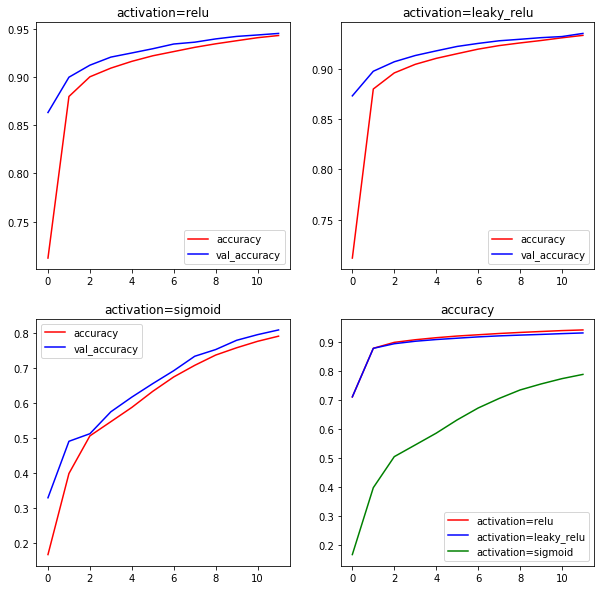

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(10,10))

axes[0][0].set_title("activation=relu")
axes[0][0].plot(history_1.history['accuracy'],'r',label='accuracy')
axes[0][0].plot(history_1.history['val_accuracy'],'b',label='val_accuracy')
axes[0][0].legend()

axes[0][1].set_title("activation=leaky_relu")
axes[0][1].plot(history_2.history['accuracy'],'r',label='accuracy')
axes[0][1].plot(history_2.history['val_accuracy'],'b',label='val_accuracy')
axes[0][1].legend()

axes[1][0].set_title("activation=sigmoid")
axes[1][0].plot(history_3.history['accuracy'],'r',label='accuracy')
axes[1][0].plot(history_3.history['val_accuracy'],'b',label='val_accuracy')
axes[1][0].legend()

axes[1][1].set_title("accuracy")
axes[1][1].plot(history_1.history['accuracy'],'r',label='activation=relu')
axes[1][1].plot(history_2.history['accuracy'],'b',label='activation=leaky_relu')
axes[1][1].plot(history_3.history['accuracy'],'g',label='activation=sigmoid')


axes[1][1].legend()

### 3.1.3 Chỉnh số hidden layer

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12
learning_rate=0.01
input_shape=(784,)

In [ ]:
# 3 hidden layer
model_1=Model(input_shape,[512,32,10],learning_rate,'relu').model

In [ ]:
# 5 hidden layer
model_2=Model(input_shape,[512,256,128,32,10],learning_rate,'relu').model

In [ ]:
# 8 hidden layer
model_3=Model(input_shape,[512,256,256,256,128,64,32,10],learning_rate,'relu').model

In [ ]:
history_1=model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 0.1961 - accuracy: 0.9443 - val_loss: 0.1900 - val_accuracy: 0.9450
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.1878 - accuracy: 0.9467 - val_loss: 0.1833 - val_accuracy: 0.9482
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1803 - accuracy: 0.9490 - val_loss: 0.1789 - val_accuracy: 0.9493
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1730 - accuracy: 0.9510 - val_loss: 0.1713 - val_accuracy: 0.9504
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1665 - accuracy: 0.9532 - val_loss: 0.1643 - val_accuracy: 0.9536
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1601 - accuracy: 0.9551 - val_loss: 0.1594 - val_accuracy: 0.9542
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.1545 - accuracy: 0.9565 - val_loss: 0.1570 - val_accuracy: 0.9561
Epoch 

In [ ]:
history_2=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1245 - accuracy: 0.9645 - val_loss: 0.1285 - val_accuracy: 0.9595
Epoch 2/12
469/469 [==============================] - 2s 5ms/step - loss: 0.1171 - accuracy: 0.9666 - val_loss: 0.1242 - val_accuracy: 0.9617
Epoch 3/12
469/469 [==============================] - 2s 5ms/step - loss: 0.1107 - accuracy: 0.9683 - val_loss: 0.1239 - val_accuracy: 0.9615
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1045 - accuracy: 0.9699 - val_loss: 0.1152 - val_accuracy: 0.9645
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0982 - accuracy: 0.9721 - val_loss: 0.1175 - val_accuracy: 0.9629
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0934 - accuracy: 0.9736 - val_loss: 0.1077 - val_accuracy: 0.9681
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0885 - accuracy: 0.9744 - val_loss: 0.1036 - val_accuracy: 0.9686
Epoch 

In [ ]:
history_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0905 - accuracy: 0.9734 - val_loss: 0.1105 - val_accuracy: 0.9662
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0821 - accuracy: 0.9757 - val_loss: 0.1142 - val_accuracy: 0.9640
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0748 - accuracy: 0.9779 - val_loss: 0.1034 - val_accuracy: 0.9691
Epoch 4/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0698 - accuracy: 0.9797 - val_loss: 0.0948 - val_accuracy: 0.9711
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0632 - accuracy: 0.9815 - val_loss: 0.1007 - val_accuracy: 0.9683
Epoch 6/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0587 - accuracy: 0.9829 - val_loss: 0.0963 - val_accuracy: 0.9713
Epoch 7/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0539 - accuracy: 0.9846 - val_loss: 0.1000 - val_accuracy: 0.9702
Epoch 

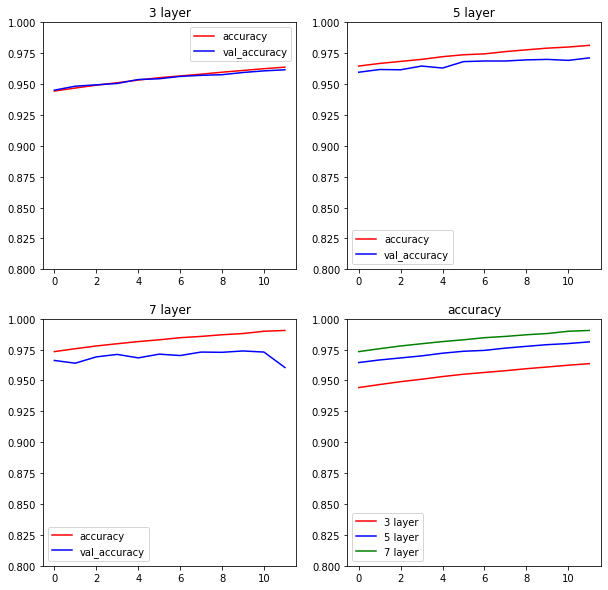

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(10,10))

axes[0][0].set_title("3 layer")
axes[0][0].plot(history_1.history['accuracy'],'r',label='accuracy')
axes[0][0].plot(history_1.history['val_accuracy'],'b',label='val_accuracy')
axes[0][0].legend()
axes[0][0].set_ylim([0.8,1])

axes[0][1].set_title("5 layer")
axes[0][1].plot(history_2.history['accuracy'],'r',label='accuracy')
axes[0][1].plot(history_2.history['val_accuracy'],'b',label='val_accuracy')
axes[0][1].legend()
axes[0][1].set_ylim([0.8,1])


axes[1][0].set_title("7 layer")
axes[1][0].plot(history_3.history['accuracy'],'r',label='accuracy')
axes[1][0].plot(history_3.history['val_accuracy'],'b',label='val_accuracy')
axes[1][0].legend()
axes[1][0].set_ylim([0.8,1])


axes[1][1].set_title("accuracy")
axes[1][1].plot(history_1.history['accuracy'],'r',label='3 layer')
axes[1][1].plot(history_2.history['accuracy'],'b',label='5 layer')
axes[1][1].plot(history_3.history['accuracy'],'g',label='7 layer')
axes[1][1].set_ylim([0.8,1])


axes[1][1].legend()

## 3.2 Thử dùng các model đơn giản hơn (không có hidden layer, 1 hidden layer) hay phức tạp hơn (nhiều hidden layer và node hơn), vẽ loss function theo epoch tương ứng.

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12
learning_rate=0.01
input_shape=(784,)

In [ ]:
# Model don gian, Khong co hidden layer
model_1=Sequential()
model_1.add(Dense(num_classes,activation='softmax',input_shape=input_shape))
model_1.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate),metrics=['accuracy'])

In [ ]:
# Model phuc tap hon, 5 layer
model_2=Model(input_shape,[512,256,128,32,10],learning_rate,'relu').model

In [ ]:
# Model 5 layer, tang so node
model_2=Model(input_shape,[512,512,256,32,10],learning_rate,'relu').model

In [ ]:
history_1=model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 1.2580 - accuracy: 0.7148 - val_loss: 0.7972 - val_accuracy: 0.8340
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.7097 - accuracy: 0.8419 - val_loss: 0.6012 - val_accuracy: 0.8644
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5845 - accuracy: 0.8599 - val_loss: 0.5217 - val_accuracy: 0.8758
Epoch 4/12
469/469 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.8695 - val_loss: 0.4768 - val_accuracy: 0.8815
Epoch 5/12
469/469 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.8758 - val_loss: 0.4473 - val_accuracy: 0.8867
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4611 - accuracy: 0.8803 - val_loss: 0.4261 - val_accuracy: 0.8899
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4420 - accuracy: 0.8838 - val_loss: 0.4102 - val_accuracy: 0.8929
Epoch 

In [ ]:
history_2=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 1.2293 - accuracy: 0.6927 - val_loss: 0.4872 - val_accuracy: 0.8743
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 0.3969 - accuracy: 0.8921 - val_loss: 0.3176 - val_accuracy: 0.9109
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.3041 - accuracy: 0.9125 - val_loss: 0.2870 - val_accuracy: 0.9162
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2625 - accuracy: 0.9247 - val_loss: 0.2407 - val_accuracy: 0.9332
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2338 - accuracy: 0.9327 - val_loss: 0.2154 - val_accuracy: 0.9384
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2112 - accuracy: 0.9390 - val_loss: 0.2001 - val_accuracy: 0.9418
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1923 - accuracy: 0.9443 - val_loss: 0.1876 - val_accuracy: 0.9451
Epoch 

In [ ]:
history_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9914 - val_loss: 0.1089 - val_accuracy: 0.9683
Epoch 2/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0292 - accuracy: 0.9923 - val_loss: 0.0932 - val_accuracy: 0.9732
Epoch 3/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0255 - accuracy: 0.9939 - val_loss: 0.0840 - val_accuracy: 0.9763
Epoch 4/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0241 - accuracy: 0.9939 - val_loss: 0.1493 - val_accuracy: 0.9583
Epoch 5/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0873 - accuracy: 0.9843 - val_loss: 0.0941 - val_accuracy: 0.9723
Epoch 6/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9930 - val_loss: 0.0856 - val_accuracy: 0.9760
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0199 - accuracy: 0.9959 - val_loss: 0.0862 - val_accuracy: 0.9765
Epoch 

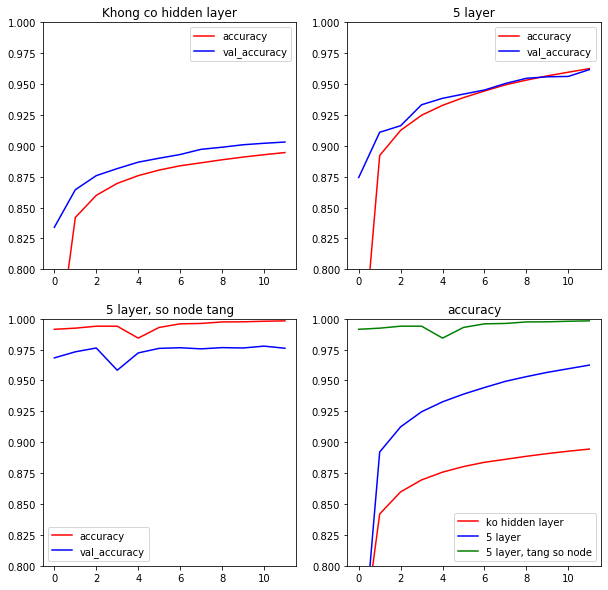

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(10,10))

axes[0][0].set_title("Khong co hidden layer")
axes[0][0].plot(history_1.history['accuracy'],'r',label='accuracy')
axes[0][0].plot(history_1.history['val_accuracy'],'b',label='val_accuracy')
axes[0][0].legend()
axes[0][0].set_ylim([0.8,1])

axes[0][1].set_title("5 layer")
axes[0][1].plot(history_2.history['accuracy'],'r',label='accuracy')
axes[0][1].plot(history_2.history['val_accuracy'],'b',label='val_accuracy')
axes[0][1].legend()
axes[0][1].set_ylim([0.8,1])


axes[1][0].set_title("5 layer, so node tang")
axes[1][0].plot(history_3.history['accuracy'],'r',label='accuracy')
axes[1][0].plot(history_3.history['val_accuracy'],'b',label='val_accuracy')
axes[1][0].legend()
axes[1][0].set_ylim([0.8,1])


axes[1][1].set_title("accuracy")
axes[1][1].plot(history_1.history['accuracy'],'r',label='ko hidden layer')
axes[1][1].plot(history_2.history['accuracy'],'b',label='5 layer')
axes[1][1].plot(history_3.history['accuracy'],'g',label='5 layer, tang so node')
axes[1][1].set_ylim([0.8,1])


axes[1][1].legend()

# 4. Phân loại ảnh trong dữ liệu cifar 10

In [ ]:
from __future__ import print_function
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [ ]:
# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# reshape & normalize data
x_train=x_train.reshape((x_train.shape[0],-1))/255.
x_test=x_test.reshape((x_test.shape[0],-1))/255.
y_train=y_train.reshape((y_train.shape[0],))
y_test=y_test.reshape((y_test.shape[0],))

In [ ]:
#conver to one hot
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [ ]:
input_shape=(3072,)
num_classes=10
batch_size = 128
epochs = 15
learning_rate=0.01

In [ ]:
model=Model(input_shape,[1536,768,384,128,num_classes],learning_rate,'relu').model

In [ ]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 1536)              4720128   
_________________________________________________________________
dense_161 (Dense)            (None, 768)               1180416   
_________________________________________________________________
dense_162 (Dense)            (None, 384)               295296    
_________________________________________________________________
dense_163 (Dense)            (None, 128)               49280     
_________________________________________________________________
dense_164 (Dense)            (None, 10)                1290      
Total params: 6,246,410
Trainable params: 6,246,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9759 - accuracy: 0.2909 - val_loss: 1.8325 - val_accuracy: 0.3452
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 1.7800 - accuracy: 0.3689 - val_loss: 1.7259 - val_accuracy: 0.3853
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6962 - accuracy: 0.4021 - val_loss: 1.8556 - val_accuracy: 0.3488
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6454 - accuracy: 0.4178 - val_loss: 1.6699 - val_accuracy: 0.4037
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5959 - accuracy: 0.4382 - val_loss: 1.6591 - val_accuracy: 0.4050
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5582 - accuracy: 0.4500 - val_loss: 1.5891 - val_accuracy: 0.4411
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5272 - accuracy: 0.4595 - val_loss: 1.5150 - val_accuracy: 0.4593
Epoch 

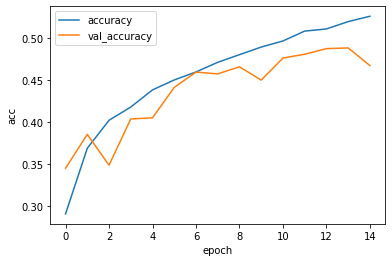

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
# train them 5 epoch
history_2=model.fit(x_train,y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
391/391 [==============================] - 3s 8ms/step - loss: 1.3178 - accuracy: 0.5330 - val_loss: 1.4515 - val_accuracy: 0.4863
Epoch 2/5
391/391 [==============================] - 3s 8ms/step - loss: 1.3010 - accuracy: 0.5401 - val_loss: 1.3710 - val_accuracy: 0.5134
Epoch 3/5
391/391 [==============================] - 3s 8ms/step - loss: 1.2800 - accuracy: 0.5489 - val_loss: 1.3787 - val_accuracy: 0.5044
Epoch 4/5
391/391 [==============================] - 3s 7ms/step - loss: 1.2643 - accuracy: 0.5545 - val_loss: 1.3701 - val_accuracy: 0.5095
Epoch 5/5
391/391 [==============================] - 3s 7ms/step - loss: 1.2452 - accuracy: 0.5619 - val_loss: 1.3788 - val_accuracy: 0.5145


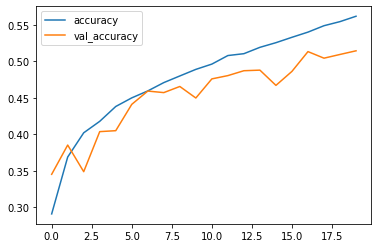

In [ ]:
plt.plot(history.history['accuracy']+history_2.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy']+history_2.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# 5. Code feedforward bằng numpy và kiểm tra tính chính xác của hàm bằng model tương ứng keras, có thể khởi tạo weight, bias trong layer bằng 1 trong keras, rồi so sánh với code mình implement xem output giống nhau không?

In [ ]:
import numpy as np


In [ ]:
def softmax_stable(Z):
    e_Z=np.exp(Z-np.max(Z,axis=1,keepdims=True))
    A=e_Z/e_Z.sum(axis=1,keepdims=True)
    return A

In [ ]:
def init_weights(layers):
    weights={}
    for layer in range(1,len(layers)):
        weights['W'+str(layer)]=np.random.randn(layers[layer-1],layers[layer])
        weights['b'+str(layer)]=np.zeros(layers[layer])
    return weights    

In [ ]:
#input_shape=784
# 3 layer 
weights=init_weights([784,512,256,10])

In [ ]:
print("Shape of W1:",weights['W1'].shape)
print("Shape of W2:",weights['W2'].shape)
print("Shape of W3:",weights['W3'].shape)

print("Shape of b1:",weights['b1'].shape)
print("Shape of b2:",weights['b2'].shape)
print("Shape of b3:",weights['b3'].shape)

Shape of W1: (784, 512)
Shape of W2: (512, 256)
Shape of W3: (256, 10)
Shape of b1: (512,)
Shape of b2: (256,)
Shape of b3: (10,)


In [ ]:
def feed_forward(X,W1,b1,W2,b2,W3,b3):
    Z1=X.dot(W1)+b1
    A1=np.maximum(Z1,0)
    
    Z2=A1.dot(W2)+b2
    A2=np.maximum(Z2,0)
    
    Z3=A2.dot(W3)+b3
    Yhat=softmax_stable(Z3)
    
    return Yhat
    

In [ ]:
X=np.random.randn(100,784)
y=np.random.randint(0,10,100)

In [ ]:
W1=weights['W1']
b1=weights['b1']
W2=weights['W2']
b2=weights['b2']
W3=weights['W3']
b3=weights['b3']

In [ ]:
# dung numpy 
Yhat=feed_forward(X,W1,b1,W2,b2,W3,b3)

In [ ]:
# dung keras
model=Sequential()
model.add(Dense(512,activation='relu',weights=[W1,b1],input_shape=(784,)))
model.add(Dense(256,activation='relu',weights=[W2,b2]))
model.add(Dense(10,activation='softmax',weights=[W3,b3]))

In [ ]:
Yhat_keras=model.predict(X)

In [ ]:
Yhat_keras.shape

(100, 10)

In [ ]:
# so sanh su tuong dong
print("Norm hieu cua 2 output viet bang numpy va keras:",np.linalg.norm(Yhat-Yhat_keras))

Norm hieu cua 2 output viet bang numpy va keras: 5.235333352502082e-10


# 6. (Optional) Hiểu và implement backpropagation cho bài 5

In [ ]:
def softmax_stable(Z):
    e_Z=np.exp(Z-np.max(Z,axis=1,keepdims=True))
    A=e_Z/e_Z.sum(axis=1,keepdims=True)
    return A

def crossentropy_loss(Yhat,y):
    """
    Yhat: a numpy array of shape (Npoints, nClasses) -- predicted output
    y: a numpy array of shape (Npoints) -- ground truth.
    NOTE: We don’t need to use the one-hot vector here since most of elements
    are zeros. When programming in numpy, in each row of Yhat, we need to access
    to the corresponding index only.
    """
    id0=range(Yhat.shape[0])
    return -np.mean(np.log(Yhat[id0,y]))

def nn_init(d0,d1,d2):

    W1=0.01*np.random.rand(d0,d1)
    b1=np.zeros(d1)
    W2=0.01*np.random.rand(d1,d2)
    b2=np.zeros(d2)
    
    return (W1,b1,W2,b2)

def nn_predict(X,W1,b1,W2,b2):
    Z1=X.dot(W1)+b1 #shape (N,d1)
    A1=np.maximum(Z1,0) #shape(N,d1)
    Z2=A1.dot(W2)+b2 #shape(N,d2)
    A2=softmax_stable(Z2)
    
    return np.argmax(A2,axis=1)

def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y.reshape(-1,1))) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
def neural_network(X,y,W1,b1,W2,b2,eta,epoch,batch_size=128):
    loss_hist=[]
    
    for i in range(epoch): #numer of epoches
        mini_batches = create_mini_batches(X, y, batch_size)
        add=True
        for mini_batch in mini_batches:
            X_mini,y_mini=mini_batch
            y_mini=y_mini.reshape(y_mini.shape[0],).astype(int)
            
            #forward
            Z1=X_mini.dot(W1)+b1
            A1=np.maximum(Z1,0)
            Z2=A1.dot(W2)+b2
            Yhat=softmax_stable(Z2)
            if add==True:          
                loss=crossentropy_loss(Yhat,y_mini)
                print("epoch {}/{} loss:{}".format(i+1,epoch,loss))
                loss_hist.append(loss)
            
            #back propagation
            id0=range(Yhat.shape[0])
            Yhat[id0,y_mini]-=1
            
            E2=Yhat/Yhat.shape[0]
            dW2 = np.dot(A1.T, E2) 
            db2 = np.sum(E2, axis = 0) 
            E1 = np.dot(E2, W2.T)
            E1[Z1 <= 0] = 0
            dW1 = np.dot(X_mini.T, E1) 
            db1 = np.sum(E1, axis = 0) 
            
            #update weight
            W1+=-eta*dW1
            b1+=-eta*db1
            W2+=-eta*dW2
            b2+=-eta*db2
            add=False

        
    return (W1,b1,W2,b2,loss_hist)


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape((x_train.shape[0],-1))/255.
x_test=x_test.reshape((x_test.shape[0],-1))/255.

In [ ]:
y_train.shape

(60000,)

In [ ]:

d0 = 784 # data dimension
d1 = h = 128 # number of hidden units
d2 = C = 10 # number of classes
eta = 0.01 # learning rate
(W1,b1,W2,b2)=nn_init(d0,d1,d2)

(W1, b1, W2, b2, loss_hist) =neural_network(x_train, y_train, W1, b1, W2, b2, eta,20)


epoch 1/20 loss:2.304882200515201
epoch 2/20 loss:2.125010408787051
epoch 3/20 loss:1.3407964578576976
epoch 4/20 loss:0.7230241159887667
epoch 5/20 loss:0.6487440710429488
epoch 6/20 loss:0.47248165727730984
epoch 7/20 loss:0.5515794900667818
epoch 8/20 loss:0.40254073081552966
epoch 9/20 loss:0.49878689263792886
epoch 10/20 loss:0.45497566595256284
epoch 11/20 loss:0.4474390624056572
epoch 12/20 loss:0.3505972409127257
epoch 13/20 loss:0.397414676280218
epoch 14/20 loss:0.3271373882145463
epoch 15/20 loss:0.3737898635956313
epoch 16/20 loss:0.37762890956181516
epoch 17/20 loss:0.19907659794960086
epoch 18/20 loss:0.35039653494364564
epoch 19/20 loss:0.3149442609155888
epoch 20/20 loss:0.28615095005088265


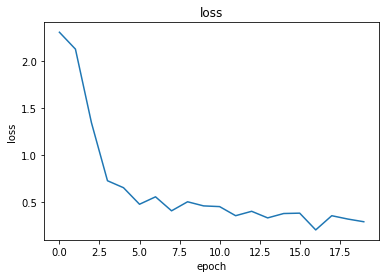

In [ ]:
import matplotlib.pyplot as plt
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(loss_hist)

In [ ]:
y_pred=nn_predict(x_test,W1,b1,W2,b2)

In [ ]:
import sklearn
print("Accuracy on test data:",sklearn.metrics.accuracy_score(y_pred,y_test))

Accuracy on test data: 0.9184
